<a href="https://colab.research.google.com/github/yeomko22/data_analytics_camp_2023_share/blob/main/week18_deeplearning_cv/ch18_4_load_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch18_4 load pretrained model

이전 챕터에서 다양한 CNN 아키텍쳐들을 살펴보았습니다. 이러한 아키텍쳐를 직접 코딩하고, 수백만장의 이미지에 대해서 직접 학습시키는 것은 무척 수고스러운 일입니다만, 이미 학습이 완료된 모델들이 많이 공개되어 있습니다. 이번 챕터에서는 이런 공개된 모델들을 쉽게 가져다가 사용하는 방법을 익혀보겠습니다.


## Pretrained Model 사용하기

### Load Model

다음 문서를 보면 pretrained model을 로드할 수 있는 다양한 방법들에 대해서 소개되어 있습니다.
https://pytorch.org/vision/stable/models.html  

[link text](https://)이 중에서 우리는 미리 학습된 resnet 18 모델을 불러와보겠습니다.

In [ ]:
from torchvision.models import resnet18, ResNet18_Weights

weights = ResNet18_Weights.IMAGENET1K_V1
model = resnet18(weights=weights)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 244MB/s]


In [ ]:
from torchsummary import summary

summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

### Inference

In [ ]:
preprocess = weights.transforms()

In [ ]:
from PIL import Image

image_dir = "./drive/MyDrive/dscamp_2023/images"
file_names = ["test1.jpeg", "test2.jpeg", "test3.jpeg"]
images = [Image.open(f"{image_dir}/{file_name}") for file_name in file_names]

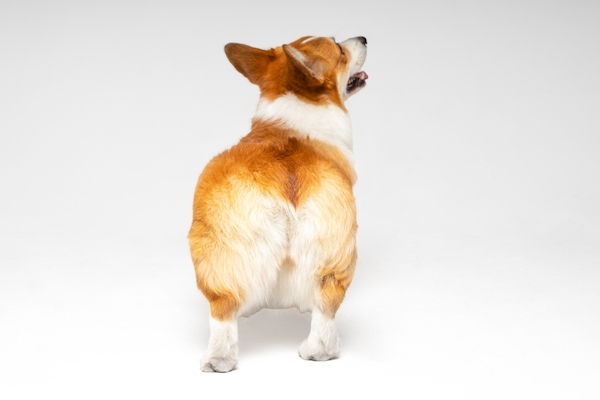

In [ ]:
images[0]

In [ ]:
import json

with open("./drive/MyDrive/dscamp_2023/imagenet_labels.json") as fr:
    imagenet_labels = json.loads(fr.read())

In [ ]:
import torch

model.eval()
for image in images:
    image_tensor = preprocess(image)
    outputs = model(image_tensor.unsqueeze(0))
    probs = torch.nn.functional.softmax(outputs[0], dim=0)
    pred = torch.argmax(probs).item()
    predicted_label = imagenet_labels[str(pred)]
    print(predicted_label)

Pembroke, Pembroke Welsh corgi
golden retriever
standard poodle


## 정리

이번 챕터에서는 대량의 데이터 셋을 학습한 pretrained model을 가져와서 사용하는 방법에 대해서 배워봤습니다. 다음 챕터에서는 이런 pretrained model을 내 용도에 맞게 fine-tuning 하는 방법에 대해서 알아보겠습니다.